In [ ]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
%tensorflow_version 1.11

`%tensorflow_version` only switches the major version: 1.x or 2.x.
You set: `1.11`. This will be interpreted as: `1.x`.


TensorFlow 1.x selected.


In [ ]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50
from keras import Model, layers

Using TensorFlow backend.


In [ ]:
!unrar x "/content/drive/My Drive/geekl.rar" "/content/drive/My Drive/"


UNRAR 5.50 freeware      Copyright (c) 1993-2017 Alexander Roshal


Extracting from /content/drive/My Drive/geekl.rar


Would you like to replace the existing file /content/drive/My Drive/validation/BrownSpot/IMG_20190419_113206.jpg
5310837 bytes, modified on 2020-07-10 10:51
with a new one
5310837 bytes, modified on 2019-11-15 22:49

[Y]es, [N]o, [A]ll, n[E]ver, [R]ename, [Q]uit 

In [ ]:
input_datagen = ImageDataGenerator(zoom_range=[0.5, 1.0], rotation_range=50,
                width_shift_range=0.1, height_shift_range=0.2, shear_range=0.2,
                horizontal_flip=True, fill_mode='reflect',brightness_range=[0.5, 1.0])


batch_size = 256

# load training images
train_generator = input_datagen.flow_from_directory(
        r'/content/drive/My Drive//train',  # load train images
        target_size=(224, 224),  # shrink target size to 224 x 224
        classes = ['BrownSpot','Healthy','Hispa','LeafBlast'],
        class_mode='categorical',
        batch_size=batch_size)

# load validation images
validation_generator = input_datagen.flow_from_directory(
        r'/content/drive/My Drive/validation',  # validation images
        target_size=(224, 224),  # shrink target size to 224 x 224
        classes = ['BrownSpot','Healthy','Hispa','LeafBlast'], # output classes
        class_mode='categorical',
        batch_size=batch_size)


In [ ]:
resnet_base_layer = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in resnet_base_layer.layers:
    layer.trainable = False

Instructions for updating:
If using Keras pass *_constraint arguments to layers.



/usr/local/lib/python3.6/dist-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


94658560/94653016 [==============================] - 1s 0us/step


In [ ]:
final_layer = resnet_base_layer.output
final_layer = layers.GlobalAveragePooling2D()(final_layer)
final_layer = layers.Dense(256, activation='sigmoid')(final_layer) # 256 neurons
final_layer = layers.Dense(128, activation='sigmoid')(final_layer) # 128 neurons
final_layer = layers.Dense(64, activation='sigmoid')(final_layer) # 64 neurons
final_layer = layers.Dropout(0.2)(final_layer) # apply dropout of 0.2
predictions = layers.Dense(4, activation='softmax')(final_layer) # output of 4 classes
model = Model(resnet_base_layer.input, predictions)

In [ ]:
from keras.optimizers import Adam

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(lr=0.001),
              metrics=['acc'])

In [ ]:
total_sample=train_generator.n
n_epochs = 10
val_sample = validation_generator.n

In [ ]:
history = model.fit_generator(
        train_generator,
        steps_per_epoch=int(total_sample/batch_size),
        epochs=n_epochs,
        validation_data=validation_generator,
        validation_steps=int(val_sample/batch_size),
        shuffle=True,
        verbose=2)


Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 3 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 6 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 4 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 5 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 2 could not be retrieved. It could be because a worker has died.
  UserWarning)
/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be beca

 - 1128s - loss: 1.4450 - acc: 0.2374 - val_loss: 1.3748 - val_acc: 0.2617
Epoch 2/10


/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 1 could not be retrieved. It could be because a worker has died.
  UserWarning)


 - 392s - loss: 1.3962 - acc: 0.2708 - val_loss: 1.3694 - val_acc: 0.3542
Epoch 3/10
 - 230s - loss: 1.3377 - acc: 0.3690 - val_loss: 1.3598 - val_acc: 0.3320
Epoch 4/10
 - 233s - loss: 1.3114 - acc: 0.3822 - val_loss: 1.3310 - val_acc: 0.3611
Epoch 5/10
 - 254s - loss: 1.2349 - acc: 0.4412 - val_loss: 1.2943 - val_acc: 0.3594
Epoch 6/10
 - 188s - loss: 1.2083 - acc: 0.4462 - val_loss: 1.2846 - val_acc: 0.4097
Epoch 7/10
 - 302s - loss: 1.1629 - acc: 0.4831 - val_loss: 1.2463 - val_acc: 0.4062
Epoch 8/10
 - 206s - loss: 1.1537 - acc: 0.4777 - val_loss: 1.3320 - val_acc: 0.3472
Epoch 9/10
 - 191s - loss: 1.1169 - acc: 0.5097 - val_loss: 1.2683 - val_acc: 0.3867
Epoch 10/10
 - 179s - loss: 1.0754 - acc: 0.5254 - val_loss: 1.1853 - val_acc: 0.4028


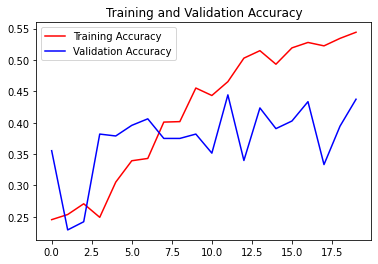

<Figure size 432x288 with 0 Axes>

In [ ]:
acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r',label = 'Training Accuracy')
plt.plot(epochs, val_acc, 'b', label = 'Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

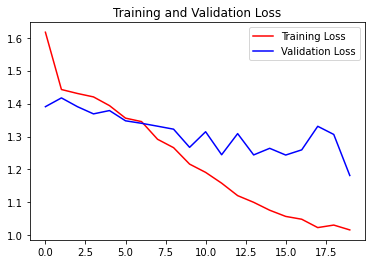

<Figure size 432x288 with 0 Axes>

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(loss))
plt.plot(epochs, loss, 'r',label = 'Training Loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation Loss')
plt.title('Training and Validation Loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
test_generator = input_datagen.flow_from_directory(
         '/content/drive/My Drive//test',  # test images
        target_size=(224, 224),  # resized to 224 x 224
        class_mode = None,
        shuffle = False,
        batch_size=92)

test_generator.reset()

Found 92 images belonging to 4 classes.


In [ ]:
preds = model.predict_generator(test_generator,verbose=1,steps=int(test_generator.n/92))

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 0 could not be retrieved. It could be because a worker has died.
  UserWarning)


1/1 [==============================] - 89s 89s/step


In [ ]:
predicted_classes_idx = np.array(preds.argmax(axis=1))
idx_to_cls = {value: key for key, value in train_generator.class_indices.items()}
predicted_classes = np.vectorize(idx_to_cls.get)(predicted_classes_idx)
test_classes = [f.split('/')[0] for f in test_generator.filenames]

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
conf_matrix = confusion_matrix(test_classes,predicted_classes)
conf_matrix

array([[ 5, 13,  3,  2],
       [ 2, 13,  7,  1],
       [ 1, 14,  7,  1],
       [ 7,  8,  7,  1]])

In [ ]:
print(classification_report(test_classes,predicted_classes))

              precision    recall  f1-score   support

   BrownSpot       0.33      0.22      0.26        23
     Healthy       0.27      0.57      0.37        23
       Hispa       0.29      0.30      0.30        23
   LeafBlast       0.20      0.04      0.07        23

    accuracy                           0.28        92
   macro avg       0.27      0.28      0.25        92
weighted avg       0.27      0.28      0.25        92



In [ ]:
accuracy_score(test_classes,predicted_classes)

0.2826086956521739

In [ ]:
model.save('model.h5')

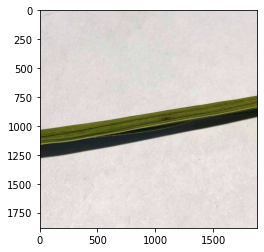

In [ ]:
import matplotlib.image as mpimg
%matplotlib inline
plt.figure(figsize=(5,4))
image = mpimg.imread('/content/drive/My Drive/test/BrownSpot/IMG_2992.jpg')
plt.imshow(image)

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/test/LeafBlast/IMG_2980.jpg', target_size = (224,224))

test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image).round()

print(result)

if result[0][0] == 1:
    print("BrownSpot")
elif result[0][1] == 1:
    print("Healthy")
elif result[0][2] == 1:
    print("Hispa")
elif result[0][3] == 1:
    print("LeafBlast")

[[0. 0. 0. 0.]]


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/test/Hispa/IMG_20190419_094238.jpg', target_size = (224,224))

test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image).round()

print(result)

if result[0][0] == 1:
    print("BrownSpot")
elif result[0][1] == 1:
    print("Healthy")
elif result[0][2] == 1:
    print("Hispa")
elif result[0][3] == 1:
    print("LeafBlast")

[[0. 0. 0. 0.]]


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/test/Healthy/IMG_20190419_094939.jpg', target_size = (224,224))

test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image).round()

print(result)

if result[0][0] == 1:
    print("BrownSpot")
elif result[0][1] == 1:
    print("Healthy")
elif result[0][2] == 1:
    print("Hispa")
elif result[0][3] == 1:
    print("LeafBlast")

[[0. 0. 0. 0.]]


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('/content/drive/My Drive/test/BrownSpot/IMG_20190419_103257.jpg', target_size = (224,224))

test_image = np.expand_dims(test_image, axis=0)
result = model.predict(test_image).round()

print(result)

if result[0][0] == 1:
    print("BrownSpot")
elif result[0][1] == 1:
    print("Healthy")
elif result[0][2] == 1:
    print("Hispa")
elif result[0][3] == 1:
    print("LeafBlast")

[[0. 0. 0. 0.]]


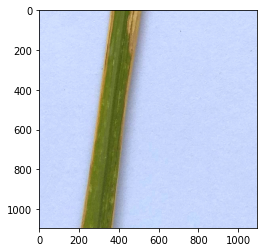

In [ ]:
import matplotlib.image as mpimg
%matplotlib inline
plt.figure(figsize=(5,4))
image = mpimg.imread('/content/drive/My Drive/test/LeafBlast/IMG_20190419_100837.jpg')
plt.imshow(image)

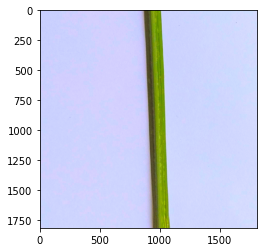

In [ ]:
import matplotlib.image as mpimg
%matplotlib inline
plt.figure(figsize=(5,4))
image = mpimg.imread('/content/drive/My Drive/test/Healthy/IMG_20190419_095515.jpg')
plt.imshow(image)

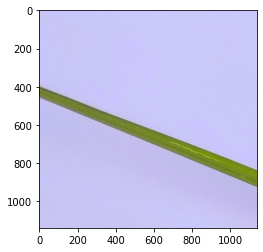

In [ ]:
import matplotlib.image as mpimg
%matplotlib inline
plt.figure(figsize=(5,4))
image = mpimg.imread('/content/drive/My Drive/test/Hispa/IMG_20190419_095010.jpg')
plt.imshow(image)